# Communicate Data Finding (Ford Go Bike System)

### (by Abanoub Nady)

In [1]:
###import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline

In [2]:
#read data
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Data Wrangle
### Assesing data
##### 1-start_station_id and bike_id column  must be string 
##### 2-some missing values in some column like('member_gender'-'member_birth_year'-'end_station_name'-'end_station_id'-'start_station_name'-'start_station_id')
##### 3-birthyear should be int
##### 4- start_time and end time should be a datetime
##### 5- calculat the duration and Age

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.duplicated().sum()

0

## Cleaning data

In [5]:
#change data types
df['start_station_id']=df['start_station_id'].astype('str')
df['end_station_id']=df['end_station_id'].astype('str')
df['bike_id']=df['bike_id'].astype('str')
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [6]:
#calculating the duration in minutes
df['duration_in_min']=(df['end_time']-df['start_time'])/pd.Timedelta(minutes=1)

In [7]:
#droping empty rows to clean data in start station and end station
drop_data1=df[(df['start_station_name'].isnull())|(df['end_station_name'].isnull())]
df_clean_for_trips=pd.concat([df,drop_data1]).drop_duplicates(keep=False)


In [8]:
#droping empty rows to clean data in birth year
drop_data2=df[df['member_birth_year'].isnull()]
df_clean_for_age=pd.concat([df,drop_data2]).drop_duplicates(keep=False)

In [9]:
# change the data type for birth year
df_clean_for_age['member_birth_year']=df_clean_for_age['member_birth_year'].astype('int')

In [10]:
#calculating Age
df_clean_for_age['age']=(2019-df_clean_for_age['member_birth_year']).astype('int')

In [11]:
# determine the customers trips
df_clean_for_trips['the_trip_route']=df_clean_for_trips['start_station_name']+' To '+df_clean_for_trips['end_station_name']

In [12]:
#droping data of birth year and trip
drop_data3=df_clean_for_trips[df_clean_for_trips['member_birth_year'].isnull()]
df_clean_for_trips_age=pd.concat([df_clean_for_trips,drop_data3]).drop_duplicates(keep=False)

In [13]:
#calculating Age for Q3
df_clean_for_trips_age['age']=(2013-df_clean_for_trips_age['member_birth_year']).astype('int')

# Analysis


## Univariate Exploration


In [14]:
#getting the count of each trip
the_trips_frame=(df_clean_for_trips['the_trip_route'].value_counts()).reset_index()
the_trips_frame=the_trips_frame[0:12]
the_trips_frame.rename(columns={'index':'trip_route','the_trip_route':'count'},inplace=True)


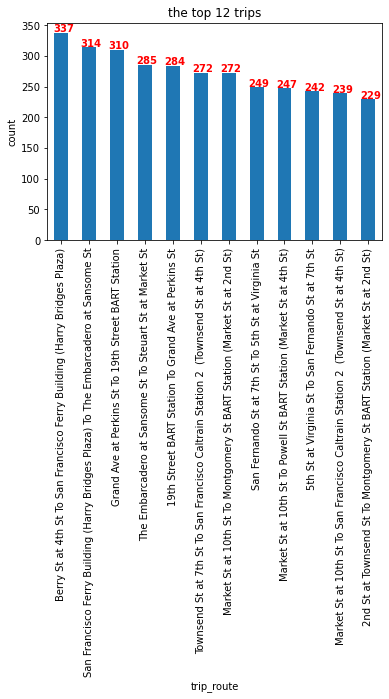

In [15]:
#plot the data
the_trips_frame.plot(kind='bar',x='trip_route',legend=False)
for i,z in enumerate(the_trips_frame['count']):
    plt.text(i-.3,z+1.75,z,color='red',fontweight='bold')
plt.title('the top 12 trips')
plt.ylabel('count');

### conclusion
##### the top  trip is from berry ST to Ferry building with count 339 and the 10 trip is from 5th ST to San Fernando ST with count 242
##### used a bar chart to compare the top 10 trips and show the count of each one 

Text(0, 0.5, 'Count')

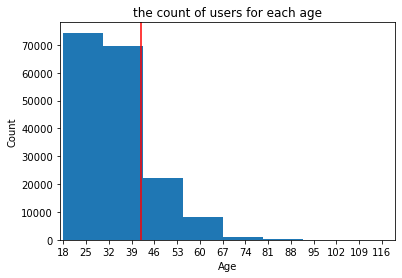

In [16]:
#plot the data
binzz=np.arange(18,120,7)
plt.hist(df_clean_for_age['age'])
plt.xticks(binzz)
plt.xlim(17,120)
plt.axvline(42,color='r')
plt.title('the count of users for each age')
plt.xlabel('Age')
plt.ylabel('Count')

#### Concolusion
##### the count of pepole from age 18 until age 42 is the most common pepole age
##### the correlation is negative witch mean that when the age is getting older less pepole use trips

## Bivariate Exploration

In [17]:
#calculate the mean and count of trip duration for each Age
age_frame=df_clean_for_age.groupby('age').mean()['duration_in_min']
age_frame=age_frame.reset_index()
#age_frame.sort_values('age')

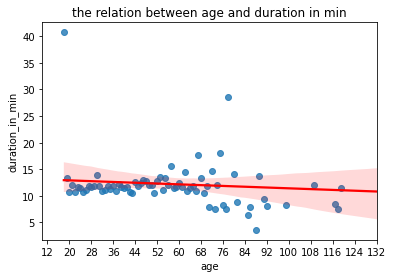

In [18]:
#plot the data
binz1=np.arange(12,135,8)
sb.regplot(data=age_frame,x='age',y='duration_in_min',line_kws={'color':'r'})
plt.xlim(10,130)
plt.xticks(binz1);
plt.title('the relation between age and duration in min');

#### Concolusion
#### the relation between age and duration is 'the age have a weak negative impact on trips duration expect some ouliers at age 20'

In [19]:
## making top_frame which include only top 12 trips data
top_10=list(the_trips_frame['trip_route'])
top_frame=df_clean_for_trips_age[df_clean_for_trips_age['the_trip_route'].isin(top_10)]
to_10_digct={}
x=1
for trip in top_10:
    to_10_digct[trip]=x
    x=x+1
top_frame.replace({'the_trip_route':to_10_digct},inplace=True)
top_frame.rename(columns={'the_trip_route':'the_trip_rank'},inplace=True)

C:\Users\Fannan\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\Fannan\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(0.5, 0.98, 'relation between age and duration in min for top 12 trips')

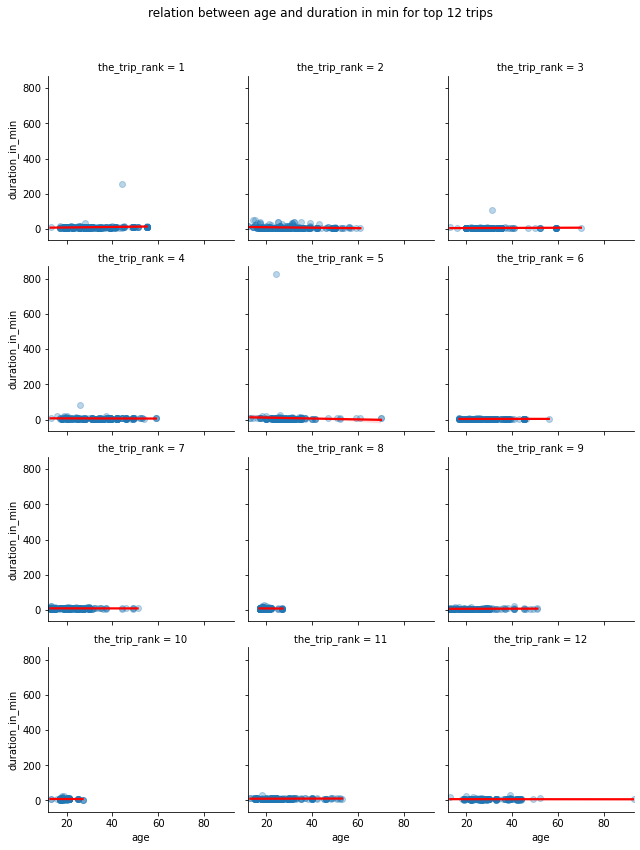

In [20]:
#plot data relation between age and duration in min for top 12 trips
g=sb.FacetGrid(data=top_frame,col='the_trip_rank',col_wrap=3)
g.map(sb.regplot,'age','duration_in_min',line_kws={'color':'r'},scatter_kws={'alpha':.3})
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('relation between age and duration in min for top 12 trips')

##### according to the pervious graph there some outliers at some trips 

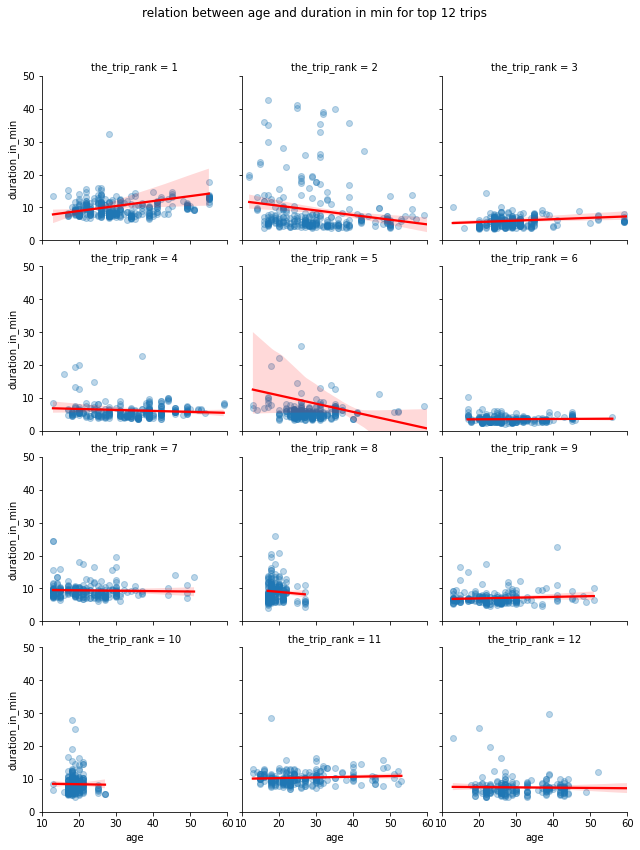

In [21]:
#remove outliere from our groph and set limit to 50
h=sb.FacetGrid(data=top_frame,col='the_trip_rank',col_wrap=3,legend_out=True)
h.map(sb.regplot,'age','duration_in_min',line_kws={'color':'r'},scatter_kws={'alpha':.3})
plt.ylim((0,50))
plt.xlim(10,60)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('relation between age and duration in min for top 12 trips');

### Conclusion
##### the relation between duration and age is weak for all trips but some of them is postive and some of them is negative
##### and we have limited age range for the 8th and 10th trips


In [22]:
# removing the missing values in memeber gender column 
top_frame_for_gender=top_frame[top_frame['member_gender'].isin(['Male','Female'])]

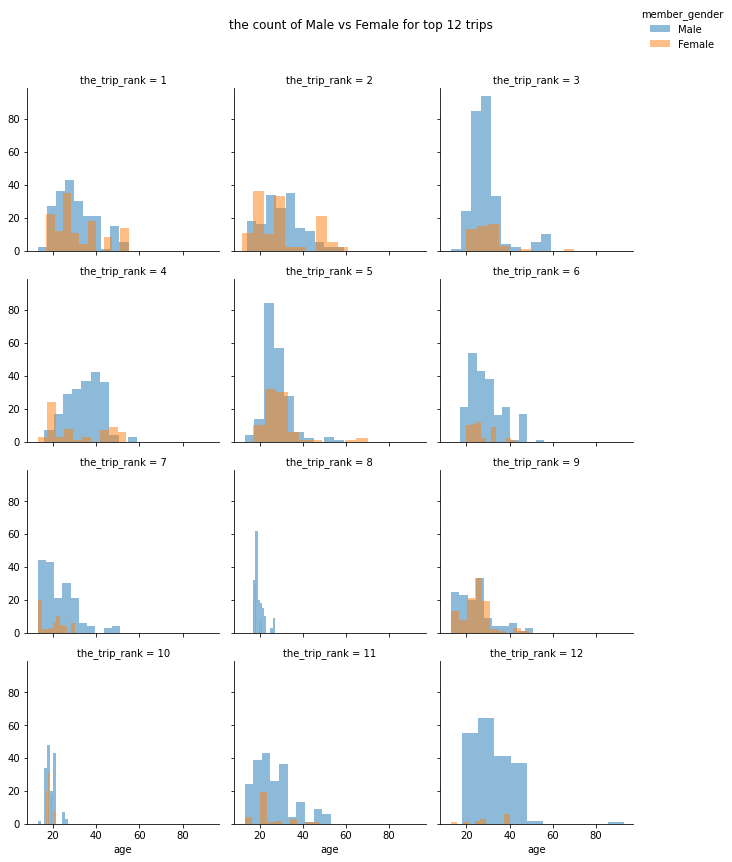

In [23]:
#ploting the data the count of Male vs Female for top 12 trips
h=sb.FacetGrid(data=top_frame_for_gender,hue='member_gender',col='the_trip_rank',col_wrap=3,legend_out=True)
h.map(plt.hist,'age',alpha=.5)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('the count of Male vs Female for top 12 trips')
h.add_legend(loc=1)

##### the male count is bigger for the most of all trips 

## Multivariate Exploration


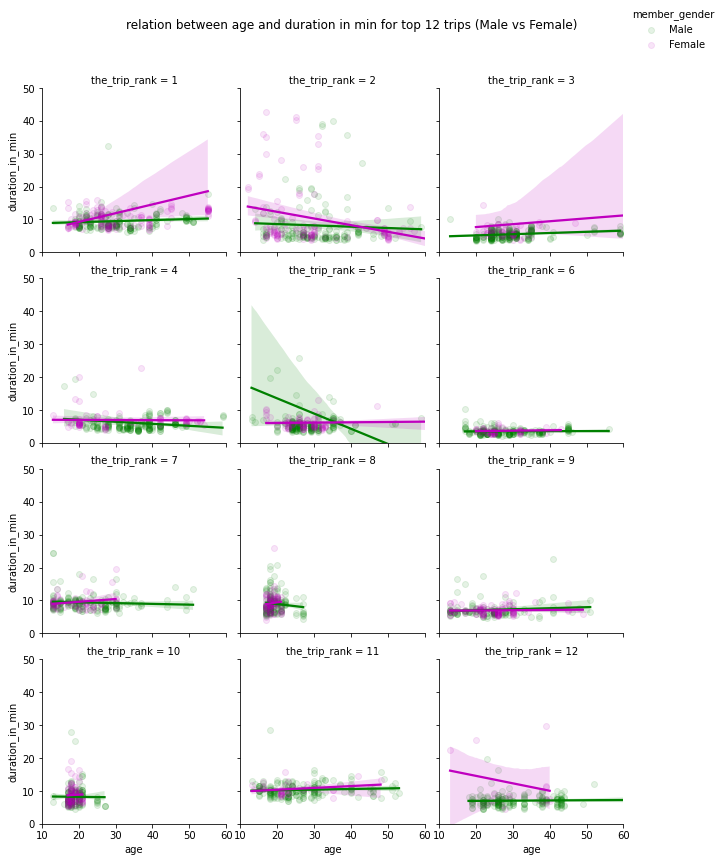

In [24]:
#plot the data relation between age and duration in min for top 12 trips (Male vs Female)
k=sb.FacetGrid(data=top_frame_for_gender,col='the_trip_rank',hue='member_gender',col_wrap=3,legend_out=True,palette={'Male':'g','Female':'m'})
k.map(sb.regplot,'age','duration_in_min',scatter_kws={'alpha':.1},line_kws={'alpha':1})
plt.ylim((0,50))
plt.xlim(10,60)
k.fig.subplots_adjust(top=0.9)
k.fig.suptitle('relation between age and duration in min for top 12 trips (Male vs Female)')
k.add_legend(loc=1)


#### there is no stabel relation between age and duration in the top 12 trips for Male and Female

Text(0.5, 0.98, 'relation between age and duration for top 12 trips (Subscriber VS Customer)')

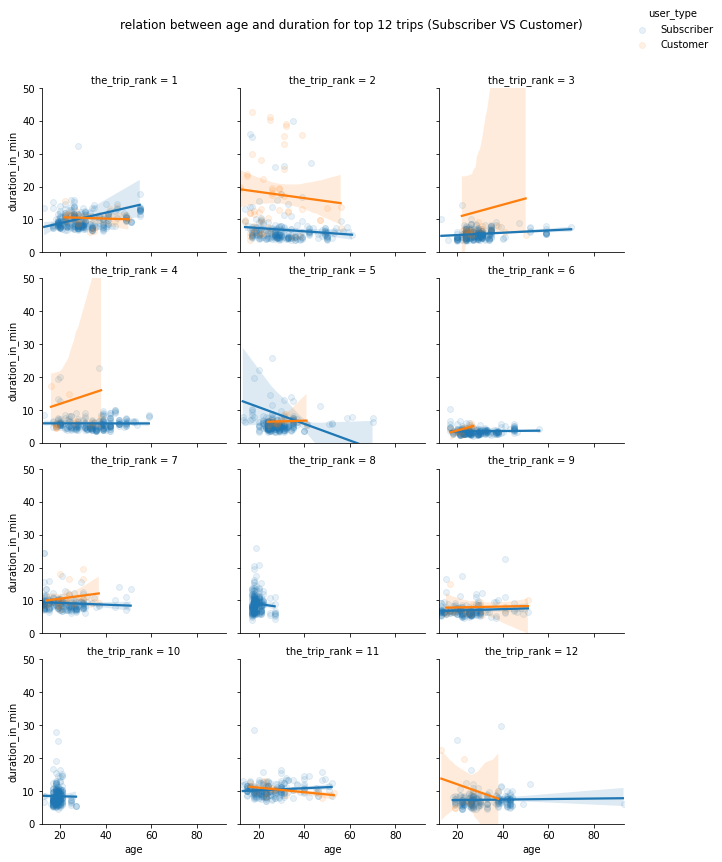

In [25]:
#plot the data relation between age and duration for top 12 trips (Subscriber VS Customer)
l=sb.FacetGrid(data=top_frame,col='the_trip_rank',col_wrap=3,hue='user_type')
l.map(sb.regplot,'age','duration_in_min',scatter_kws={'alpha':.1},line_kws={'alpha':1})
plt.ylim(0,50)
l.add_legend(loc=1)
l.fig.subplots_adjust(top=0.9)
l.fig.suptitle('relation between age and duration for top 12 trips (Subscriber VS Customer)')
